In [1]:
# librarires
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from scipy import stats
from matplotlib import pyplot
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

In [2]:
#set the directory
import os
os.chdir(r"C:\Users\ASUS\Desktop\DataSet\insurance")

In [3]:
#read data
Train = pd.read_csv("train.csv")
print(Train.shape)
print(Train.size)
Train.head(10)

(381109, 12)
4573308


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [4]:
Test = pd.read_csv("test.csv")
print(Test.shape)
print(Test.size)
Test.head(10)

(127037, 11)
1397407


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [5]:
#combine train and test
df =pd.concat([Train,Test],axis=0,sort=False)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [6]:
#checking missing values
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

There is no missing value in the data. Response is a target variable, which we need to find.

In [7]:
#description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508146 entries, 0 to 127036
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 50.4+ MB


By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


We will be able to get a idea on the outliers here by the percentiles ( In the Annual_Premium the 99th percentile is 72963 and the max is 540165 this represents the outliers in this column)

Percentage of target class

0.0    65.807662
1.0     9.192240
Name: Response, dtype: float64


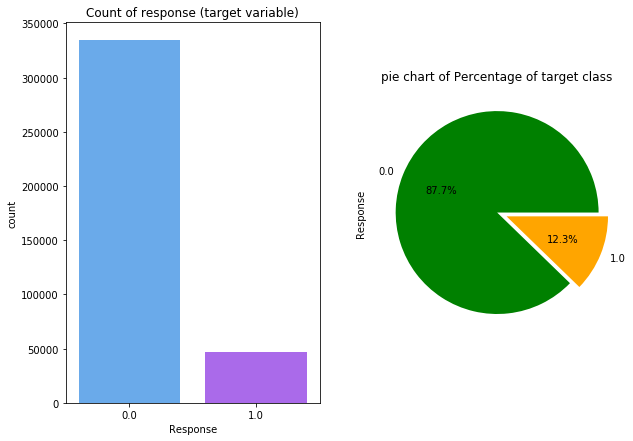

In [9]:
#TARGET variable

plt.subplot(1, 2, 1)
sns.countplot(df['Response'], palette="cool")
plt.title("Count of response (target variable)")

plt.subplot(1,2, 2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")

print( "Percentage of target class\n")
print(df['Response'].value_counts()/len(df)*100)

Here 1:Customer is interested, 0:Customer is not interested

By the plot we can say that this is the problem of imbalance binary classification problem
The indivisuals interested is 87 % as compared to the othe one.

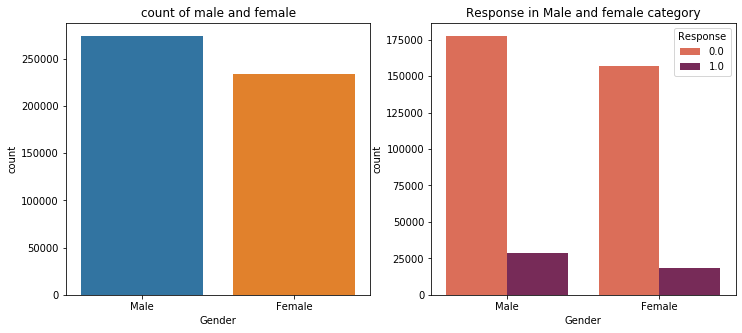

In [10]:
#Gender variable

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'])
plt.title("count of male and female")

plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()

The gender variable in the dataset is almost equally distributed
Male category is slightly greater than that of female and chances of buying the insurance is also little high.

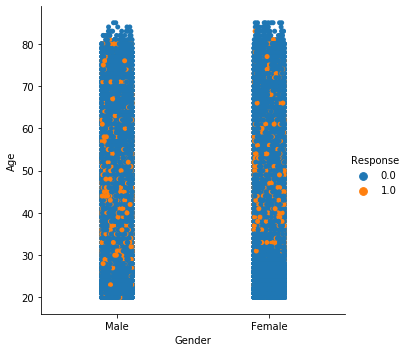

In [11]:
sns.catplot(x = 'Gender', y="Age",hue = 'Response', data=df)

Customers of age between 30 to 60 are more likely to buy insurance.
Customes of age between 20 to 30 are less likely to buy insurance.
In almost every age group, Male's are more likely to buy insurance.
Females under age 30 are very less likely ho buy insurance.

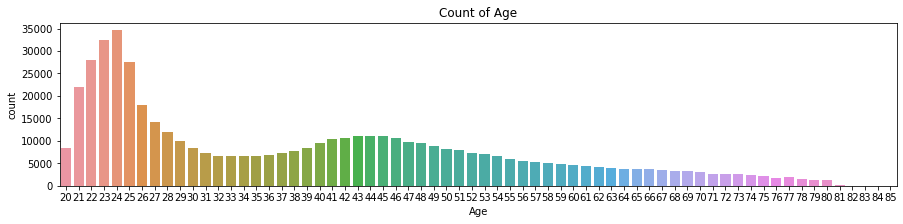

In [12]:
#Age variable

plt.figure(figsize = (15,3))
sns.countplot(df['Age'])
plt.title('Count of Age')
plt.show()

Count of the indivisuals with age 24 are greater in the dataset. 

In [13]:
#Analysing Response for different Age-Groups

age_grp_20_to_30 = df[ df['Age'] <31]
age_grp_31_to_40 = df[ df['Age'].between(31,40)]
age_grp_41_to_50 = df[ df['Age'].between(41,50)]
age_grp_50_to_60 = df[ df['Age'].between(51,60)]
age_grp_old = df[ df['Age'] >60]

age_grp = [age_grp_20_to_30,age_grp_31_to_40,age_grp_41_to_50,age_grp_50_to_60,age_grp_old]
age_grp_name = ['age_grp_20_to_30','age_grp_31_to_40','age_grp_41_to_50','age_grp_50_to_60','age_grp_old']
age_grp_dict = dict(zip(age_grp_name, age_grp))

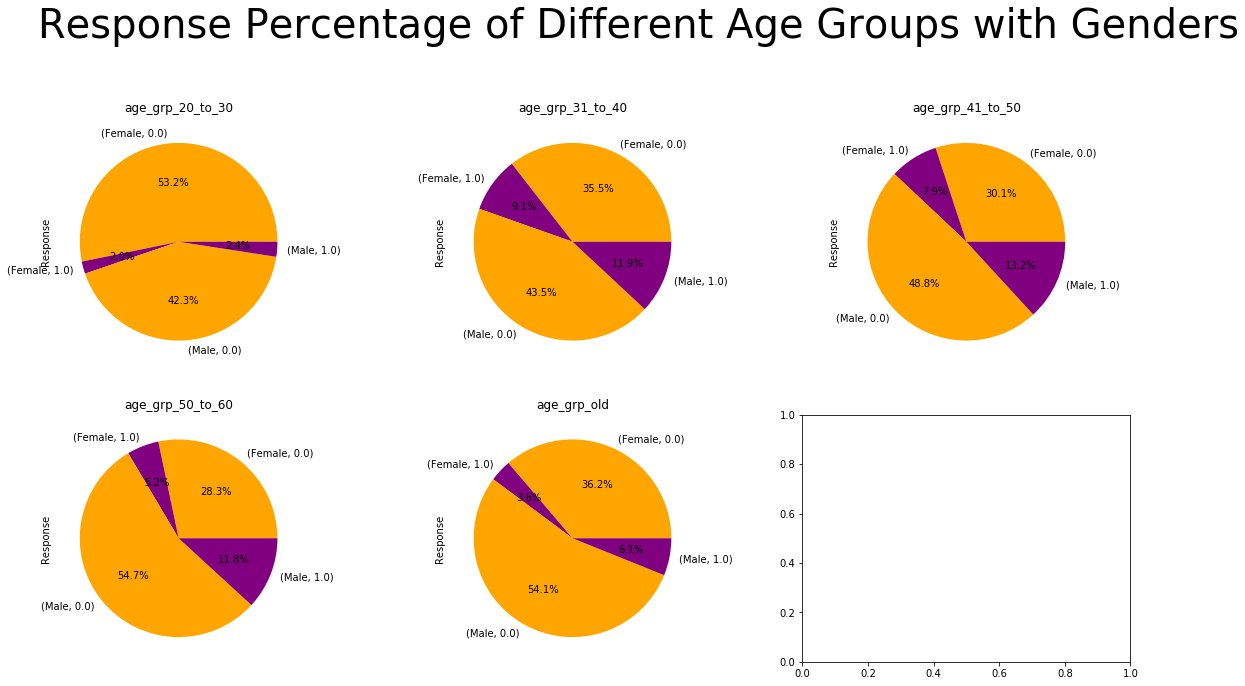

In [14]:
#Analysing Response with both 'Age-Groups' and 'Gender'

f,ax = plt.subplots(nrows=2, ncols=3, figsize = (20,10))
axx = ax.flatten()
plt.title('Response Percentage of Different Age Groups with Genders',fontsize=40,x=-0.5,y=2.5)
for pos,tup in enumerate(age_grp_dict.items()):
    axx[pos].set_title(tup[0])
    temp = tup[1]
    temp.groupby('Gender')['Response'].value_counts().plot.pie(autopct='%1.1f%%', ax = axx[pos],colors=['Orange','Purple'])

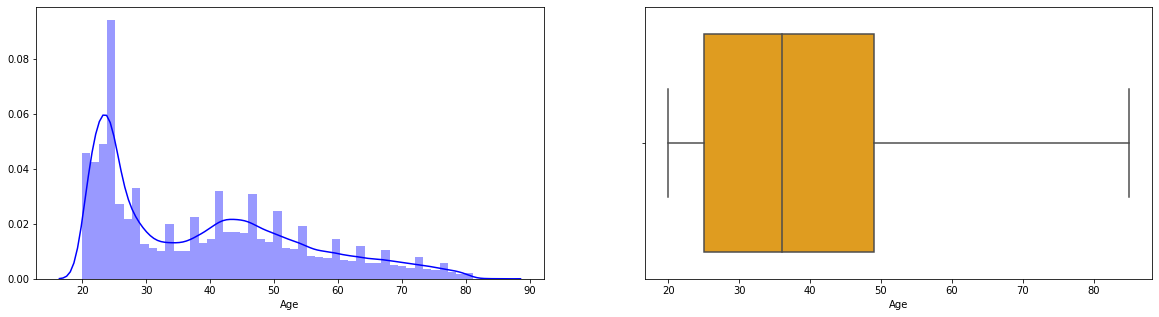

In [15]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(df['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(df['Age'],ax = axx[1],color='Orange')

Variable Age looks like right skewed.
From the boxplot we observe that there are no outliers.

Percentage of  Driving_License feature
 
1    99.793563
0     0.206437
Name: Driving_License, dtype: float64


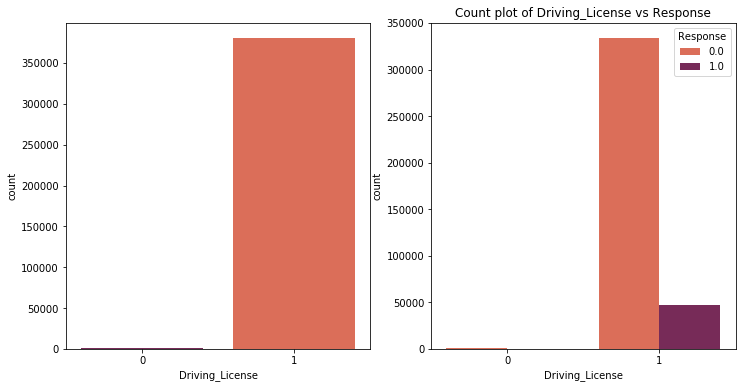

In [16]:
#Driving_License variable

print("Percentage of  Driving_License feature\n ")
print(df['Driving_License'].value_counts()/len(df)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(Train['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',ax =axx[1],data = df,palette="rocket_r")

Customers who have the Driving_License are 99%
Customers who are interested in Vehicle Insurance almost all have driving license

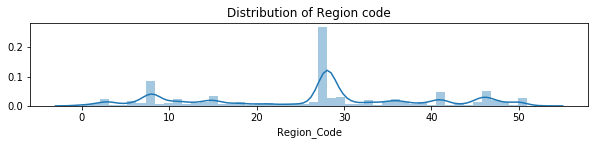

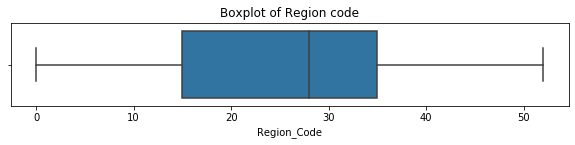

In [17]:
#Region_Code variable

plt.figure(figsize = (10,7))
plt.subplot(4,1,1)
sns.distplot(df['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))

plt.subplot(4,1,2)
sns.boxplot(df['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

The indivisuals with region code 28 the highest as compared to the other ones.
 From the box plot it looks like there is no outliers in the data.
 Further we can analyze which region has highest intrested customers.

Percentage ofPreviously_Insured feature
 
0    54.133261
1    45.866739
Name: Previously_Insured, dtype: float64


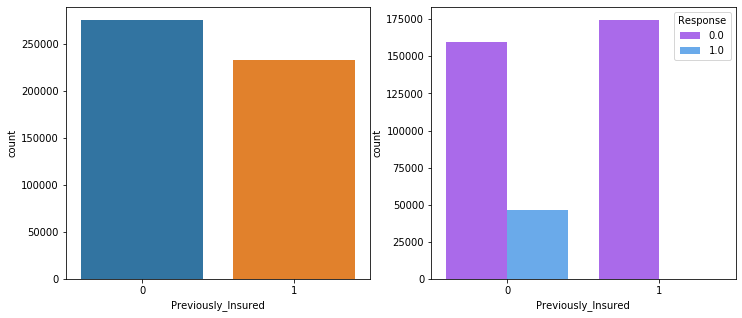

In [18]:
#Previously_Insured variable

print("Percentage ofPreviously_Insured feature\n ")
print(df['Previously_Insured'].value_counts()/len(df)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(df['Previously_Insured'],ax = axx[0])
sns.countplot('Previously_Insured', hue = 'Response',ax =axx[1],data = df,palette="cool_r")

1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance. 

 The variable perviosly insured almost has equal count.
 Customer who are not perviosly insured are likely to be intrested.

Percentage of vechicle age feature
 
1-2 Year     52.546906
< 1 Year     43.256269
> 2 Years     4.196825
Name: Vehicle_Age, dtype: float64


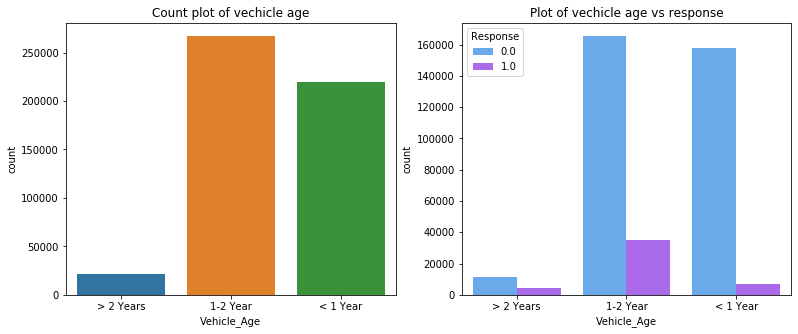

In [19]:
#Vehicle_Age variable

print("Percentage of vechicle age feature\n ")
print(df['Vehicle_Age'].value_counts()/len(df)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(df['Vehicle_Age'])
plt.title("Count plot of vechicle age")
plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.countplot('Vehicle_Age', hue = 'Response',data = df,palette="cool")

There is very less number of customers with vechicle age less than 2 years. 
 Customers with vechicle age 1-2 years are more likely to interested as compared to the other two. 

In [20]:
ls = df['Vehicle_Age'].unique()

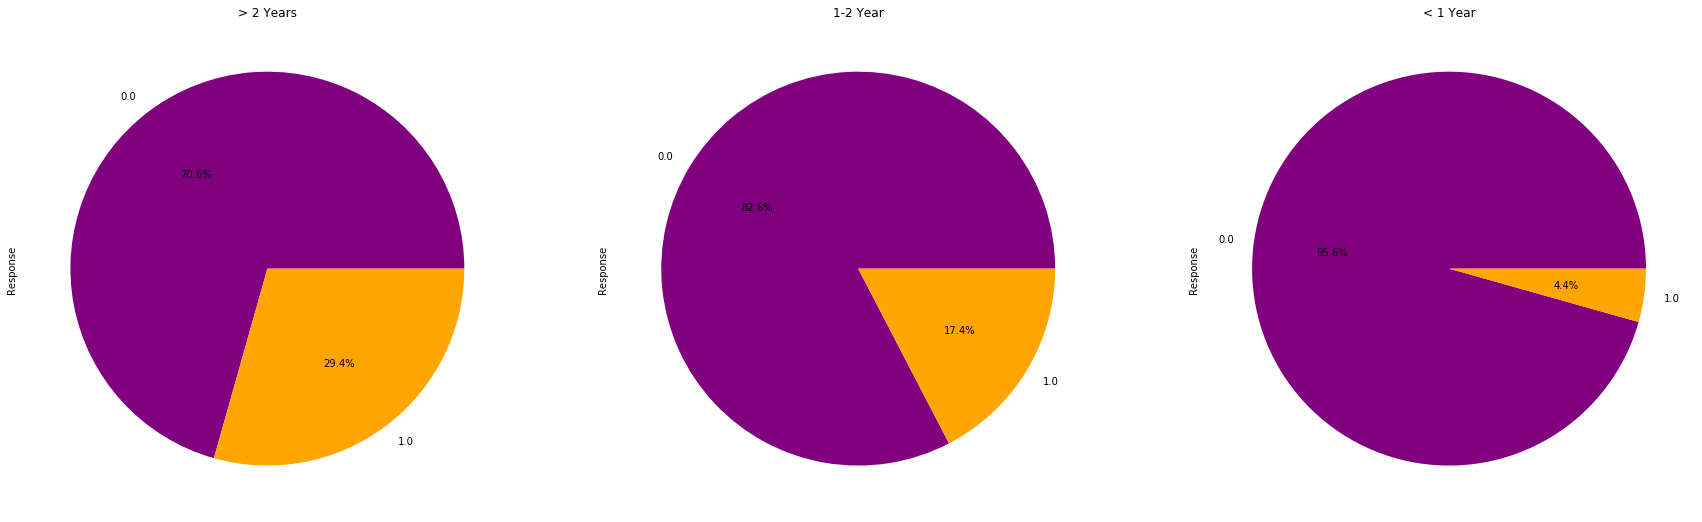

In [21]:
f,ax = plt.subplots(nrows=1, ncols=3,figsize = (30,30))
axx = ax.flatten()
for pos,val in enumerate(ls):
    axx[pos].set_title(str(val))
    df[ df['Vehicle_Age'] == val]['Response'].value_counts().plot.pie(autopct = '%1.1f%%',ax = axx[pos], colors=['Purple', 'Orange'])

We have half of our customers with Vehicle_Age 1-2 years.
 We have very few customers (4.2%) with Vehicle_Age >2 years.
 Customers with Vehicle_Age >2years have better chance (29.4%) of buying Insurance.
 Customers with with Vehicle_Age <1 years have very less chance of buying Insurance.

Percentage of vechicle damage feature
 
Yes    50.428027
No     49.571973
Name: Vehicle_Damage, dtype: float64


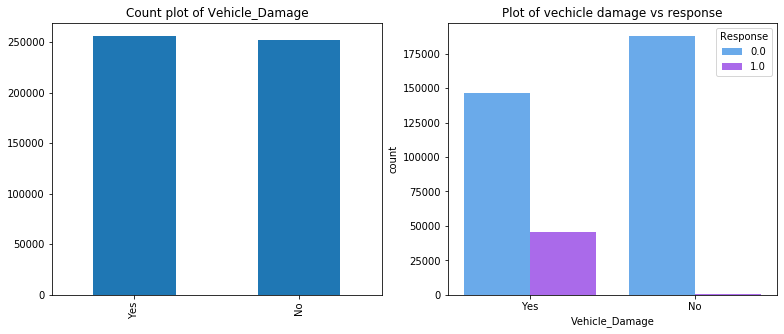

In [22]:
#Vehicle_Damage variable

print("Percentage of vechicle damage feature\n ")
print(df['Vehicle_Damage'].value_counts()/len(df)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
df['Vehicle_Damage'].value_counts().plot.bar()#count
plt.title("Count plot of Vehicle_Damage")
plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = df,palette="cool")

Customers with vechicle damage(Yes and NO) are equally distributed with (50.48 % , 49.51 %). 
 Customers with vechicle damage are more interested in Vehicle Insurance.

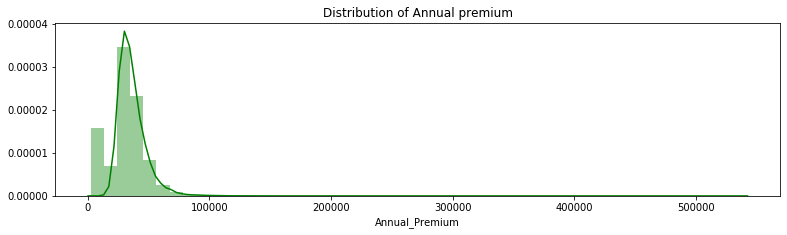

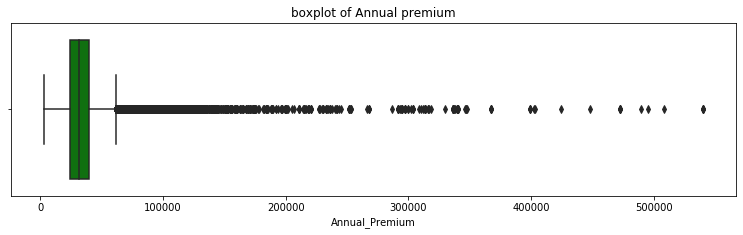

In [23]:
#Annual_Premium variable

plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
 
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

From the distribution plot we can tell that the annual premimum variable is right skewed.
 From the boxplot we can observe lot of outliers are present.

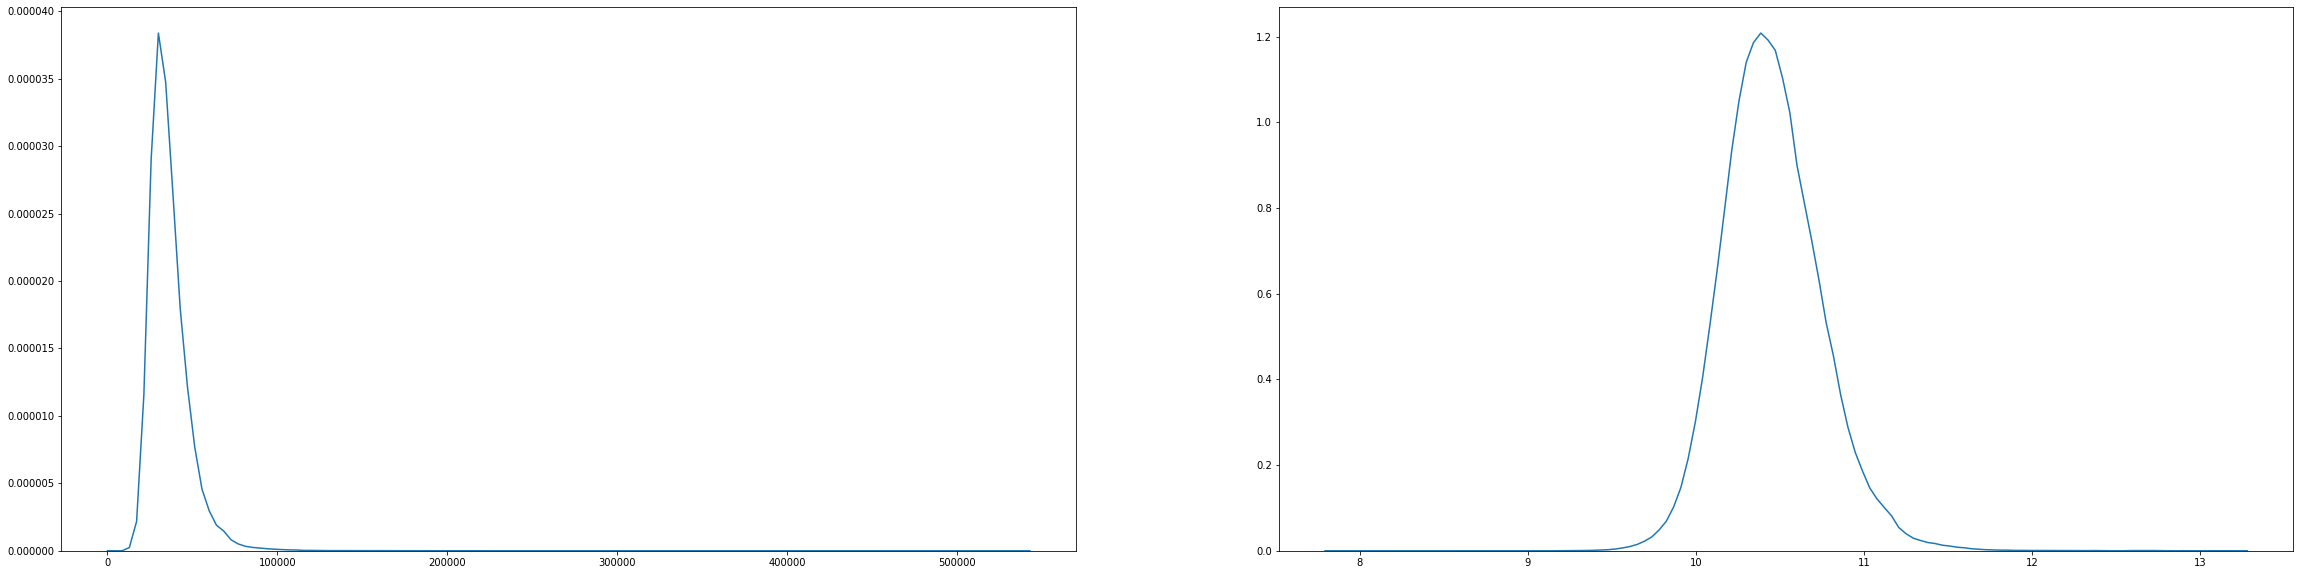

In [24]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize = (40,10))
axx = ax.flatten()
sns.kdeplot(df['Annual_Premium'], legend=False,ax = axx[0])
sns.kdeplot(np.log(df['Annual_Premium']), legend=False,ax = axx[1])#using log transformation

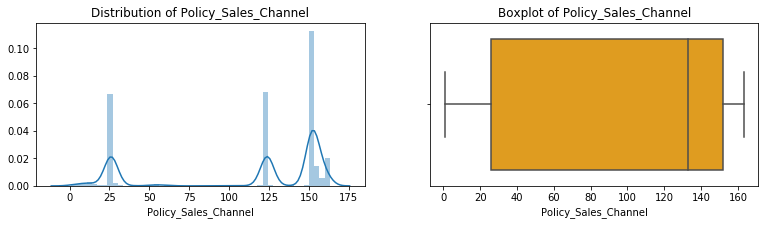

In [25]:
#Policy_Sales_Channel variable
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(df['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(df['Policy_Sales_Channel'],color='Orange')

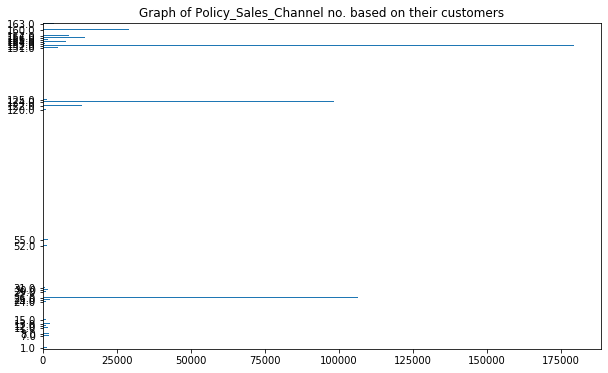

In [26]:
plt.figure(figsize = (10,6))
plt.title("Graph of Policy_Sales_Channel no. based on their customers")
df['Policy_Sales_Channel'].value_counts()[:153].plot(kind='barh')

Policy_Sales_Channel no.152 have higest number of customers.

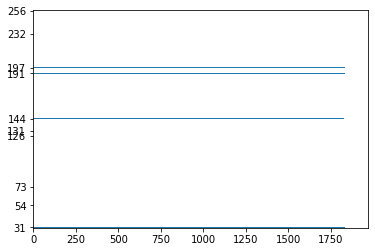

In [27]:
#Vintage variable

df['Vintage'].value_counts()[:10].plot(kind='barh')

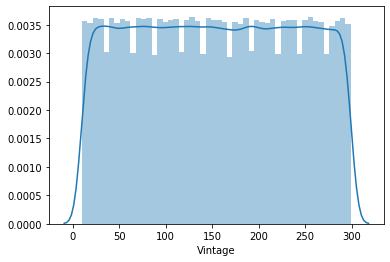

In [28]:
sns.distplot(df.Vintage)

Vintage : Number of Days, Customer has been associated with the company. Every 'Vintage' value have almost same number of customers.

In [29]:
#correlation of variables w.r.t Response

df.corr()['Response'].sort_values(ascending=False)

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

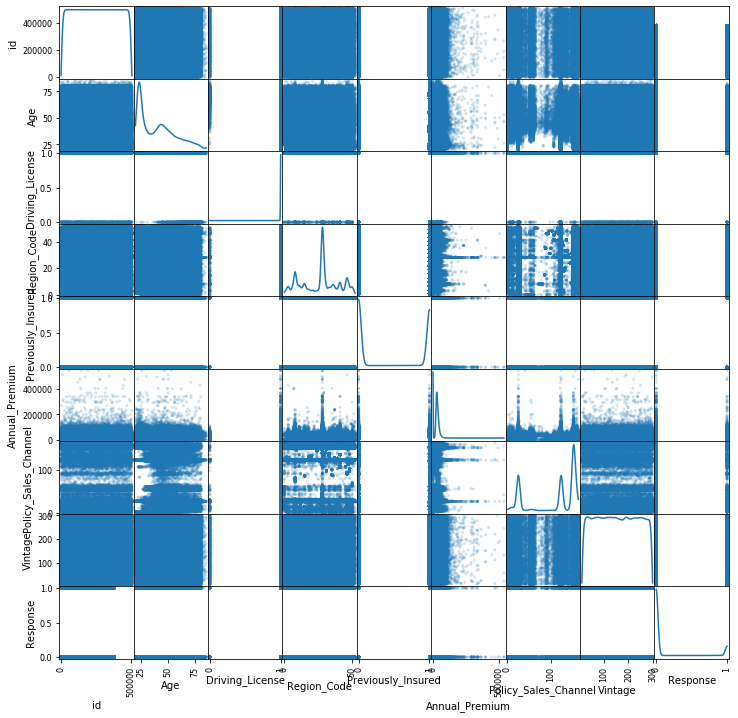

In [30]:
#covariance matrix plots over scatter matrix 

axes = pd.plotting.scatter_matrix(df, alpha=0.2,figsize=(12,12),diagonal = 'kde')
plt.show()

In [31]:
Train['is_train'] = 1
Test['is_train'] = 0
Test['Response'] = None

data = pd.concat((Train,Test))
data.set_index('id',inplace=True)
data.shape

(508146, 12)

In [32]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
id,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1


([<matplotlib.axis.XTick at 0x1de3d438fc8>,
 <a list of 12 Text xticklabel objects>)

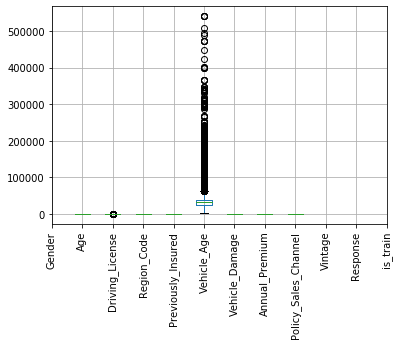

In [33]:
#outlier analysis

data.boxplot()
plt.xticks(list(range(len(data.columns))),data.columns, rotation='vertical')

In [34]:
#correlation map

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr_check = data.copy()

col_ls = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']#add cat variables too for further understaning.

for col in col_ls:
    corr_check[col] = le.fit_transform(corr_check[col])

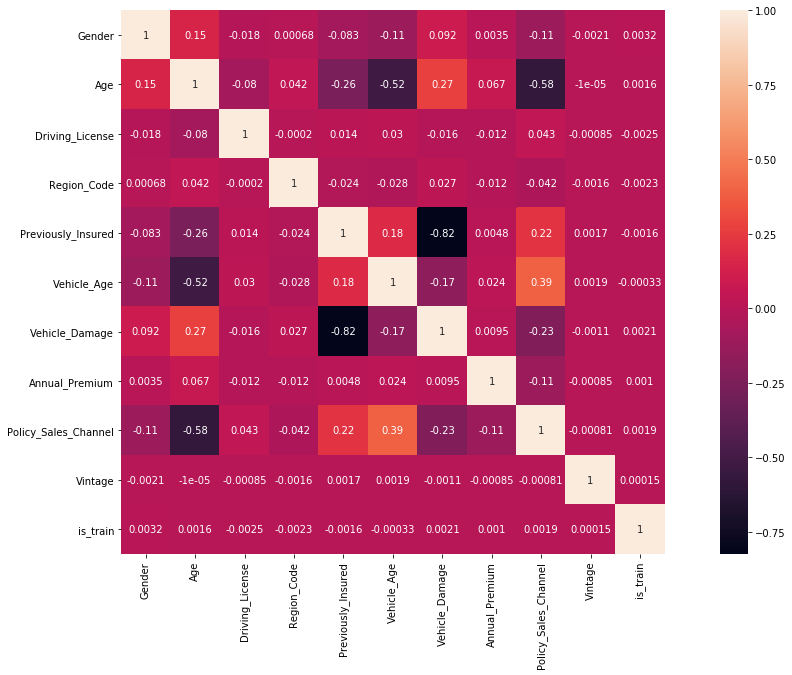

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_check.corr(), annot=True, square=True,annot_kws={'size': 10})

In [37]:
#some Data Analysis for better understanding of data for the company 

count1 = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
count1

,Vehicle_Age,Response,count
0,1-2 Year,0.0,165510
1,1-2 Year,1.0,34806
2,< 1 Year,0.0,157584
3,< 1 Year,1.0,7202
4,> 2 Years,0.0,11305
5,> 2 Years,1.0,4702


In [38]:
count2 = df.groupby(['Gender','Vehicle_Age','Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
count2

,Gender,Vehicle_Age,Vehicle_Damage,Response,count
0,Female,1-2 Year,No,0.0,29077
1,Female,1-2 Year,No,1.0,223
2,Female,1-2 Year,Yes,0.0,35532
3,Female,1-2 Year,Yes,1.0,13160
4,Female,< 1 Year,No,0.0,65852
5,Female,< 1 Year,No,1.0,195
6,Female,< 1 Year,Yes,0.0,22190
7,Female,< 1 Year,Yes,1.0,3084
8,Female,> 2 Years,No,0.0,8
9,Female,> 2 Years,Yes,0.0,4176


In [39]:
#Pivot table

count3 = df.pivot_table(index='Response', columns='Gender', values='Annual_Premium', aggfunc=np.sum, fill_value = 0)
count3

Gender,Female,Male
Response,,
0.0,4765698185,5406438592
1.0,571674629,904552543


from male customers company can get lot more than money as annual premium compare to female. 

In [40]:
#Pivot table 

count4 = df.pivot_table(index='Previously_Insured', columns='Gender', values='Response', aggfunc=np.sum, fill_value = 0)
count4

Gender,Female,Male
Previously_Insured,,
0,18123,28429
1,62,96


customers who are intrested in taking vehicle insurance- 46710.
 where customers Previously_Insured are again willing to take insurance are 158.

In [41]:
df.Previously_Insured.value_counts()

0    275076
1    233070
Name: Previously_Insured, dtype: int64

In [42]:
df.Response.value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [43]:
df.Gender.value_counts()

Male      274325
Female    233821
Name: Gender, dtype: int64

# Data Preprocessing

In [44]:
Train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [45]:
#using replace function for better understanding of variable for ml 

Train['Vehicle_Age'] = Train['Vehicle_Age'].replace({"1-2 Year":1,"< 1 Year":2,"> 2 Years":3})

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

Train['Vehicle_Age'] = le.fit_transform(Train['Vehicle_Age'])
Train['Gender'] = le.fit_transform(Train['Gender'])
Train['Vehicle_Damage'] = le.fit_transform(Train['Vehicle_Damage'])
Train['Vehicle_Age'] = le.fit_transform(Train['Vehicle_Age'])
Train['Gender'] = le.fit_transform(Train['Gender'])
Train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,1


In [47]:
#drop unnecessary variable
Train = Train.drop(['id'],axis=1)

In [48]:
Test = Test.drop(['id'],axis=1)

In [49]:
Test['Vehicle_Age'] = Test['Vehicle_Age'].replace({"1-2 Year":1,"< 1 Year":2,"> 2 Years":3})

In [50]:
Test['Vehicle_Age'] = le.fit_transform(Test['Vehicle_Age'])
Test['Gender'] = le.fit_transform(Test['Gender'])
Test['Vehicle_Damage'] = le.fit_transform(Test['Vehicle_Damage'])
Test['Vehicle_Age'] = le.fit_transform(Test['Vehicle_Age'])
Test['Gender'] = le.fit_transform(Test['Gender'])
Test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,is_train,Response
0,1,25,1,11.0,1,1,0,35786.0,152.0,53,0,None
1,1,40,1,28.0,0,0,1,33762.0,7.0,111,0,None
2,1,47,1,28.0,0,0,1,40050.0,124.0,199,0,None
3,1,24,1,27.0,1,1,1,37356.0,152.0,187,0,None
4,1,27,1,28.0,1,1,0,59097.0,152.0,297,0,None


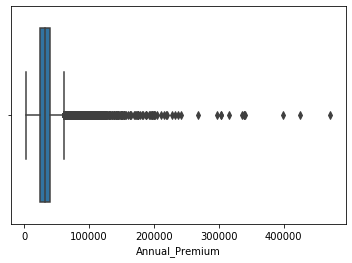

In [51]:
sns.boxplot(Test["Annual_Premium"])

In [52]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(Train["Annual_Premium"]))
print(z)
threshold = 3
print(np.where(z > 3))

Train["Annual_Premium"] = Train["Annual_Premium"][(z < 3)]

[0.57453868 0.17263624 0.4490531  ... 0.26454281 0.81638891 0.6513986 ]
(array([   167,    176,    315, ..., 380313, 380815, 380998], dtype=int64),)


In [53]:

z = np.abs(stats.zscore(Test["Annual_Premium"]))
print(z)
threshold = 3
print(np.where(z > 3))

Test["Annual_Premium"] = Test["Annual_Premium"][(z < 3)]

[0.31049188 0.19104824 0.56212611 ... 0.04264584 1.90911281 0.15329644]
(array([    41,    274,    734,   1006,   1155,   1187,   1268,   1392,
         1444,   1652,   1693,   1793,   1866,   1887,   1890,   2638,
         2950,   3088,   3382,   3489,   3534,   3664,   3714,   3981,
         4018,   4252,   4333,   4686,   4877,   4936,   4948,   4960,
         5245,   6023,   6213,   6272,   6382,   6968,   7025,   7198,
         7593,   7631,   8368,   8663,   8704,   8774,   8817,   8833,
         9019,   9954,  10477,  10480,  10652,  10766,  10845,  11057,
        11116,  11379,  11597,  11882,  12350,  12480,  12629,  12652,
        12675,  12706,  12779,  12840,  12866,  13000,  13495,  13496,
        14085,  14222,  14619,  15231,  16071,  16608,  16902,  17156,
        17304,  17476,  17534,  17732,  17750,  17928,  18120,  18349,
        18353,  19029,  19249,  19280,  19624,  19648,  19655,  19678,
        19965,  20307,  20456,  20636,  20679,  20788,  20800,  21037,
    

In [54]:
Train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,is_train
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,1


In [55]:
Test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,is_train,Response
0,1,25,1,11.0,1,1,0,35786.0,152.0,53,0,None
1,1,40,1,28.0,0,0,1,33762.0,7.0,111,0,None
2,1,47,1,28.0,0,0,1,40050.0,124.0,199,0,None
3,1,24,1,27.0,1,1,1,37356.0,152.0,187,0,None
4,1,27,1,28.0,1,1,0,59097.0,152.0,297,0,None


In [56]:
Train.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
is_train                  int64
dtype: object

In [57]:
Train = Train.fillna(Train.mean())
Test = Test.fillna(Test.mean())

In [58]:
# Changing Datatype
Train['Region_Code']=Train['Region_Code'].astype(int)
Test['Region_Code']=Test['Region_Code'].astype(int)
Train['Policy_Sales_Channel']=Train['Policy_Sales_Channel'].astype(int)
Test['Policy_Sales_Channel']=Test['Policy_Sales_Channel'].astype(int)

In [59]:
Train['Annual_Premium']=Train['Annual_Premium'].astype(int)
Test['Annual_Premium']=Test['Annual_Premium'].astype(int)

In [60]:
Train.Policy_Sales_Channel.unique()

array([ 26, 152, 160, 124,  14,  13,  30, 156, 163, 157, 122,  19,  22,
        15, 154,  16,  52, 155,  11, 151, 125,  25,  61,   1,  86,  31,
       150,  23,  60,  21, 121,   3, 139,  12,  29,  55,   7,  47, 127,
       153,  78, 158,  89,  32,   8,  10, 120,  65,   4,  42,  83, 136,
        24,  18,  56,  48, 106,  54,  93, 116,  91,  45,   9, 145, 147,
        44, 109,  37, 140, 107, 128, 131, 114, 118, 159, 119, 105, 135,
        62, 138, 129,  88,  92, 111, 113,  73,  36,  28,  35,  59,  53,
       148, 133, 108,  64,  39,  94, 132,  46,  81, 103,  90,  51,  27,
       146,  63,  96,  40,  66, 100,  95, 123,  98,  75,  69, 130, 134,
        49,  97,  38,  17, 110,  80,  71, 117,  58,  20,  76, 104,  87,
        84, 137, 126,  68,  67, 101, 115,  57,  82,  79, 112,  99,  70,
         2,  34,  33,  74, 102, 149,  43,   6,  50, 144, 143,  41])

# Model building

In [61]:
features=['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [62]:
# Train Test Split

X=Train[features]
y=Train['Response']

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=.25, random_state=150,shuffle=True)

In [63]:
#catboost model #got best score compare to other models

catb = CatBoostClassifier()
catb= catb.fit(X_Train, y_Train,cat_features=cat_col,eval_set=(X_Test, y_Test),early_stopping_rounds=30,verbose=100)
y_pred_catb = catb.predict(X_Test)
proba_catb = catb.predict_proba(X_Test)[:, 1]
print('CatBoost Base Accuracy : {}'.format(accuracy_score(y_Test,y_pred_catb)))
print('CatBoost Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_Test,proba_catb)))

Learning rate set to 0.128106
0:	learn: 0.4918088	test: 0.4918833	best: 0.4918833 (0)	total: 301ms	remaining: 5m
100:	learn: 0.2636322	test: 0.2633372	best: 0.2633372 (100)	total: 17.9s	remaining: 2m 39s
200:	learn: 0.2619984	test: 0.2632237	best: 0.2632194 (184)	total: 37.8s	remaining: 2m 30s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 0.2632147851
bestIteration = 202

Shrink model to first 203 iterations.
CatBoost Base Accuracy : 0.8787443061357292
CatBoost Base ROC_AUC_SCORE: 0.858053586778333


Text(0, 0.5, 'Feature Importance Score')

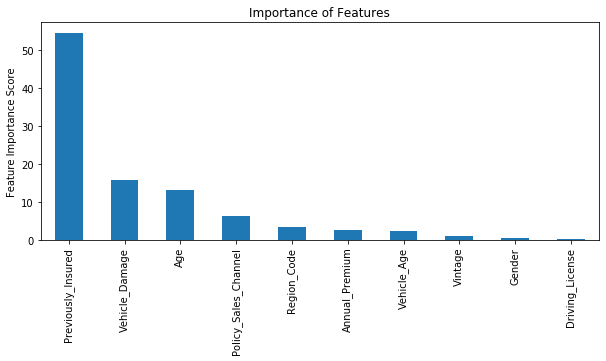

In [64]:
predictors=list(X_Train)
feat_imp = pd.Series(catb.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

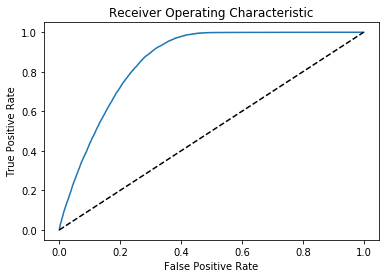

Area under curve (AUC):  0.858053586778333


In [65]:
y_score = catb.predict_proba(X_Test)[:,1]#keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_Test, y_score)

plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

pyplot.plot(fpr,tpr)
pyplot.plot([0,1], ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [66]:
#light gbm model

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_Train, y_Train)
y_pred_lgbm = lgbm_model.predict(X_Test)
proba_lgbm = lgbm_model.predict_proba(X_Test)[:,1]
print('LGBM Base Accuracy : {}'.format(accuracy_score(y_Test,y_pred_lgbm)))
print('LGBM Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_Test,proba_lgbm)))

LGBM Base Accuracy : 0.8781670480068852
LGBM Base ROC_AUC_SCORE: 0.8562030618302289


Text(0, 0.5, 'Feature Importance Score')

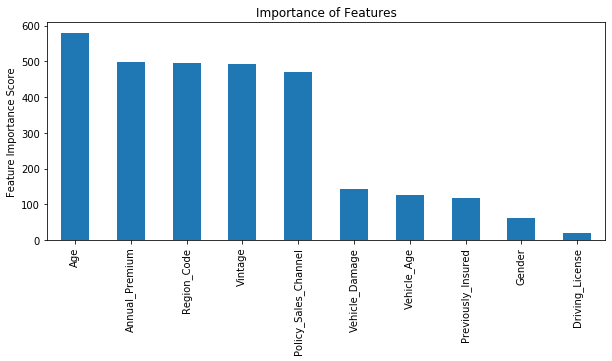

In [67]:
predictors=list(X_Train)
feat_imp = pd.Series(lgbm_model.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

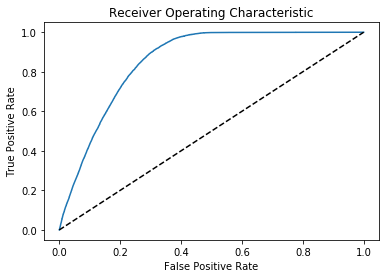

Area under curve (AUC):  0.8562030618302289


In [68]:
y_score = lgbm_model.predict_proba(X_Test)[:,1]#keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_Test, y_score)

plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

pyplot.plot(fpr,tpr)
pyplot.plot([0,1], ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [69]:
#random_forest model

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,4,5,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
r_model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
r_model.fit(X_Train,y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 12.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
y_pred_r=r_model.predict(X_Test)
proba_r = r_model.predict_proba(X_Test)[:,1]
print('random Base Accuracy : {}'.format(accuracy_score(y_Test,y_pred_r)))
print('random Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_Test,proba_r)))

random Base Accuracy : 0.8784504292701358
random Base ROC_AUC_SCORE: 0.8315203784764971


Text(0, 0.5, 'Feature Importance Score')

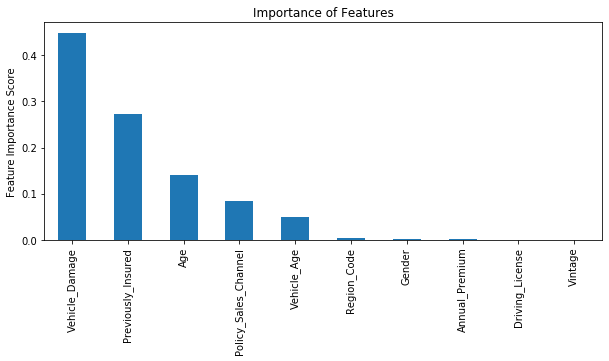

In [71]:
predictors=list(X_Train)
feat_imp = pd.Series(r_model.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(10,4))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

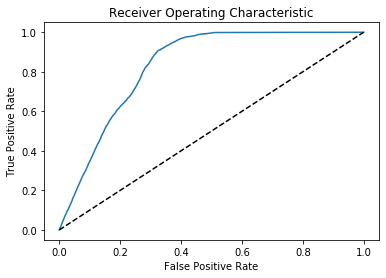

Area under curve (AUC):  0.8315203784764971


In [72]:
y_score = r_model.predict_proba(X_Test)[:,1]#keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_Test, y_score)

plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

pyplot.plot(fpr,tpr)
pyplot.plot([0,1], ls='dashed',color='black')
pyplot.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

GBC Base Accuracy : 0.8656457944121413
GBC Base ROC_AUC_SCORE: 0.8099829699206823


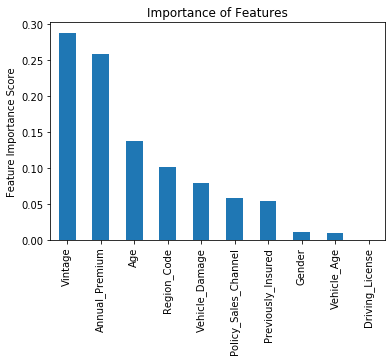

In [73]:
#gradient boosting model

GBC = GradientBoostingClassifier(n_estimators=50,max_features=3,max_depth=None)
GBC.fit(X_Train,y_Train)
predictors=list(X_Train)
feat_imp = pd.Series(GBC.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

y_pred_gbc=GBC.predict(X_Test)
proba_gbc = GBC.predict_proba(X_Test)[:,1]
print('GBC Base Accuracy : {}'.format(accuracy_score(y_Test,y_pred_gbc)))
print('GBC Base ROC_AUC_SCORE: {}'.format(roc_auc_score(y_Test,proba_gbc)))

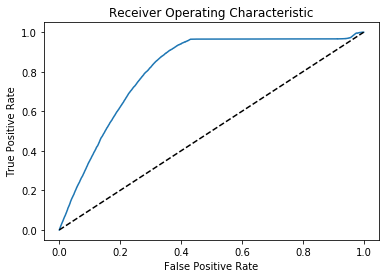

Area under curve (AUC):  0.8099829699206823


In [74]:
y_score = GBC.predict_proba(X_Test)[:,1]#keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_Test, y_score)

plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

pyplot.plot(fpr,tpr)
pyplot.plot([0,1], ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [75]:
print('------------------------------------------------------------------------------------------------------------------------')

------------------------------------------------------------------------------------------------------------------------


In [76]:
#tried to do some other models and stacking for better results but system is not supporting.. 

#compare standalone models for binary classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [77]:
#get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models


In [78]:
#evaluate a given model using cross-validation
def evaluate_model(MODEL, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(MODEL, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


In [ ]:
#get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, MODEL in models.items():
    scores = evaluate_model(MODEL, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>lr 0.877 (0.002)
>knn 0.859 (0.001)
>cart 0.823 (0.001)


In [ ]:
#get a stacking ensemble of models
    
def get_stacking():
 #define the base models                                                       
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    s_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [ ]:
# evaluate a give model using cross-validation
def evaluate_model(s_model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(s_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:

#get the models to evaluate
models = get_models()
#evaluate the models and store results
results, names = list(), list()
for name, s_model in models.items():
    scores = evaluate_model(s_model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()